In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
hours_studied = np.array([5, 10, 4, 8, 15, 9, 16, 11, 6, 14])
attendance = np.array([70, 80, 60, 75, 90, 85, 95, 88, 72, 92])

In [3]:
final_score = np.array([65, 75, 60, 70, 88, 78, 92, 82, 68, 90])

In [4]:
X = np.column_stack((hours_studied, attendance))
X = sm.add_constant(X)
y = final_score

In [5]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     337.9
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           1.09e-07
Time:                        20:59:38   Log-Likelihood:                -14.825
No. Observations:                  10   AIC:                             35.65
Df Residuals:                       7   BIC:                             36.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4207      6.653      3.520      0.0

C:\Users\RijasTT\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
new_student = [1, 12, 87]
predicted_score = model.predict(new_student)
print(f"Predicted final score: {predicted_score[0]:.2f}")

Predicted final score: 82.85


Text(0.5, 1.0, 'Linear Relationship: Hours Studied vs Score')

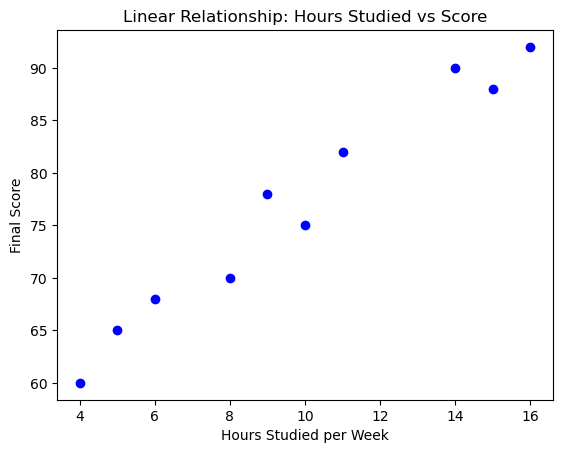

In [7]:
plt.scatter(hours_studied, final_score, color='blue')
plt.xlabel("Hours Studied per Week")
plt.ylabel("Final Score")
plt.title("Linear Relationship: Hours Studied vs Score")

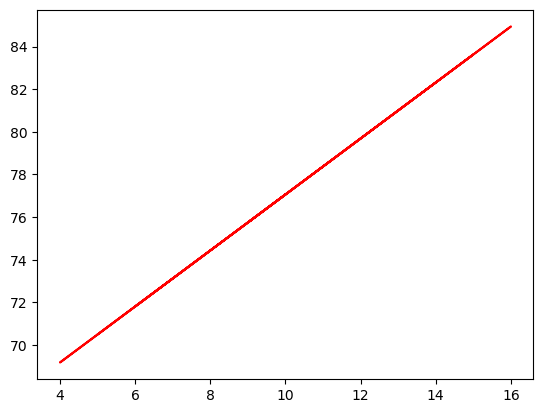

In [8]:
plt.plot(hours_studied, model.params[1]*hours_studied + model.params[0] + model.params[2]*attendance.mean(), color='red')
plt.show()

In [9]:
intercept = model.params[0]
coef_hours = model.params[1]
coef_attendance = model.params[2]

In [10]:
attendance_mean = attendance.mean()
y_pred_line = intercept + coef_hours * hours_studied + coef_attendance * attendance_mean

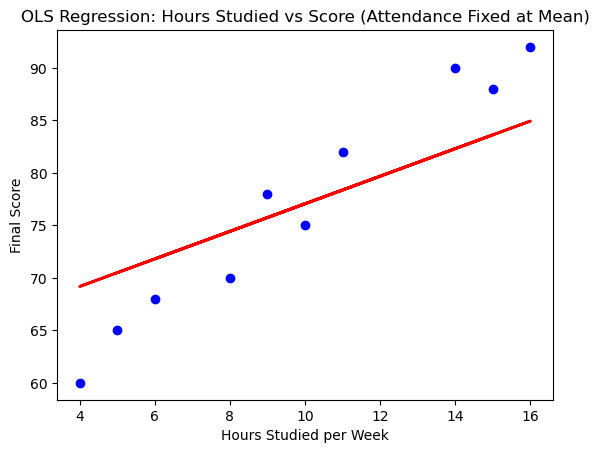

In [11]:
plt.scatter(hours_studied, final_score, color='blue')
plt.plot(hours_studied, y_pred_line, color='red', linewidth=2)
plt.xlabel("Hours Studied per Week")
plt.ylabel("Final Score")
plt.title("OLS Regression: Hours Studied vs Score (Attendance Fixed at Mean)")
plt.show()

In [34]:
residuals = final_score - y_pred_line

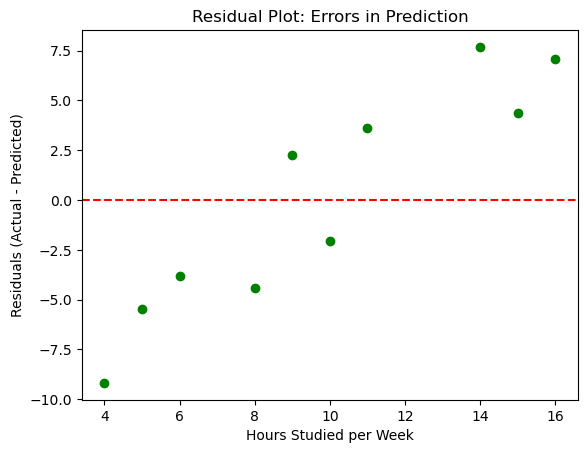

In [35]:
plt.scatter(hours_studied, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # reference line at 0
plt.xlabel("Hours Studied per Week")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot: Errors in Prediction")
plt.show()

In [36]:
plt.scatter(hours_studied, final_score, color='blue', label='Actual Scores')
plt.plot(hours_studied, y_pred_line, color='red', linewidth=2, label='Regression Line')

In [37]:
for i in range(len(hours_studied)):
    plt.vlines(x=hours_studied[i], ymin=y_pred_line[i], ymax=final_score[i], color='green', linestyle='--')

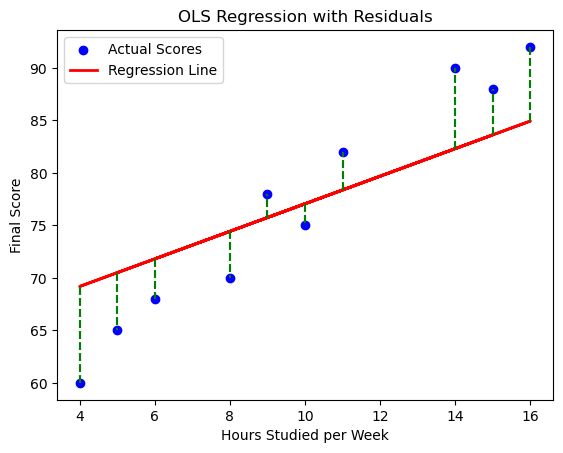

In [38]:
plt.xlabel("Hours Studied per Week")
plt.ylabel("Final Score")
plt.title("OLS Regression with Residuals")
plt.legend()
plt.show()